# Student Eval Challenge

In [2]:
#imports
# import libraries
import numpy as np
import scipy as sp
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [53]:
path = "student_comments.csv"
data = pd.read_csv(path)
data.head()

,What was the topic of the lesson?,I feel that I achieved the learning objectives for this lesson,The lesson agenda was well-organized and delivered,I feel prepared to continue practicing this skill outside of class.,What did you like about today's lesson?,What could have been better?,Do you have any other questions about the material or general comments?,Have you gone to Office Hours this week?
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,NaN,No
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,NaN,No


In [54]:
# change (shorten) the columns of the dataframe to make it easier to type
data.columns = ['topic','objectives'
              ,'delivery','prepared','like','not_like','questions','officehours']

In [55]:
# create a single metric to evaluate the overall exit ticket rating
# add a new column to the dataframe with this new metric, named 'metric'
# feel free to come up with your own metric
data['sum_metric'] = data.objectives + data.delivery + data.prepared
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,NaN,No,30
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,NaN,No,28


In [56]:
data['like'].fillna('', inplace=True)
data['not_like'].fillna('', inplace=True)
data['questions'].fillna('', inplace=True)
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28


In [57]:
#combine all of the text columns, lower them
data["text"] = data["like"].str.lower() + " " + data["not_like"].str.lower() + " " + data["questions"].str.lower()
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30,i liked the end with actually going through py...
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29,adam is great. i liked it. no
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26,loved your overview of real examples to apply ...
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24,good combination of overview and specifics! ma...
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28,the structure of the curriculum n/a yet... goo...


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
topic          67 non-null object
objectives     67 non-null int64
delivery       67 non-null int64
prepared       67 non-null int64
like           67 non-null object
not_like       67 non-null object
questions      67 non-null object
officehours    67 non-null object
sum_metric     67 non-null int64
text           67 non-null object
dtypes: int64(4), object(6)
memory usage: 5.3+ KB


In [59]:
#stopwords out
from nltk.corpus import stopwords
import re

stop = stopwords.words("english")
def stopwords(x):
    x = re.sub("[^a-z\s]", " ", x.lower())
    x = [w for w in x.split() if w not in set(stop)]
    return " ".join(x)

data["text_stop"] = data["text"].apply(stopwords)
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30,i liked the end with actually going through py...,liked end actually going python syntax seemed ...
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29,adam is great. i liked it. no,adam great liked
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26,loved your overview of real examples to apply ...,loved overview real examples apply various par...
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24,good combination of overview and specifics! ma...,good combination overview specifics making sur...
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28,the structure of the curriculum n/a yet... goo...,structure curriculum n yet good introduction far


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 11 columns):
topic          67 non-null object
objectives     67 non-null int64
delivery       67 non-null int64
prepared       67 non-null int64
like           67 non-null object
not_like       67 non-null object
questions      67 non-null object
officehours    67 non-null object
sum_metric     67 non-null int64
text           67 non-null object
text_stop      67 non-null object
dtypes: int64(4), object(7)
memory usage: 5.8+ KB


In [61]:
#tokenize word, sentence
from nltk.tokenize import word_tokenize, sent_tokenize

data["sent_token"] = data["text"].apply(sent_tokenize)
data["word_token"] = data["text"].apply(word_tokenize)
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop,sent_token,word_token
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30,i liked the end with actually going through py...,liked end actually going python syntax seemed ...,[i liked the end with actually going through p...,"[i, liked, the, end, with, actually, going, th..."
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29,adam is great. i liked it. no,adam great liked,"[adam is great., i liked it., no]","[adam, is, great, ., i, liked, it, ., no]"
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26,loved your overview of real examples to apply ...,loved overview real examples apply various par...,[loved your overview of real examples to apply...,"[loved, your, overview, of, real, examples, to..."
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24,good combination of overview and specifics! ma...,good combination overview specifics making sur...,"[good combination of overview and specifics!, ...","[good, combination, of, overview, and, specifi..."
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28,the structure of the curriculum n/a yet... goo...,structure curriculum n yet good introduction far,[the structure of the curriculum n/a yet... go...,"[the, structure, of, the, curriculum, n/a, yet..."


In [62]:
#tagged speech
from nltk import pos_tag, pos_tag_sents
data["sent_token_tag"] = pos_tag_sents(data["text"].apply(word_tokenize).tolist())
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop,sent_token,word_token,sent_token_tag
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30,i liked the end with actually going through py...,liked end actually going python syntax seemed ...,[i liked the end with actually going through p...,"[i, liked, the, end, with, actually, going, th...","[(i, NN), (liked, VBD), (the, DT), (end, NN), ..."
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29,adam is great. i liked it. no,adam great liked,"[adam is great., i liked it., no]","[adam, is, great, ., i, liked, it, ., no]","[(adam, NN), (is, VBZ), (great, JJ), (., .), (..."
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26,loved your overview of real examples to apply ...,loved overview real examples apply various par...,[loved your overview of real examples to apply...,"[loved, your, overview, of, real, examples, to...","[(loved, VBN), (your, PRP$), (overview, NN), (..."
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24,good combination of overview and specifics! ma...,good combination overview specifics making sur...,"[good combination of overview and specifics!, ...","[good, combination, of, overview, and, specifi...","[(good, JJ), (combination, NN), (of, IN), (ove..."
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28,the structure of the curriculum n/a yet... goo...,structure curriculum n yet good introduction far,[the structure of the curriculum n/a yet... go...,"[the, structure, of, the, curriculum, n/a, yet...","[(the, DT), (structure, NN), (of, IN), (the, D..."


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
topic             67 non-null object
objectives        67 non-null int64
delivery          67 non-null int64
prepared          67 non-null int64
like              67 non-null object
not_like          67 non-null object
questions         67 non-null object
officehours       67 non-null object
sum_metric        67 non-null int64
text              67 non-null object
text_stop         67 non-null object
sent_token        67 non-null object
word_token        67 non-null object
sent_token_tag    67 non-null object
dtypes: int64(4), object(10)
memory usage: 7.4+ KB


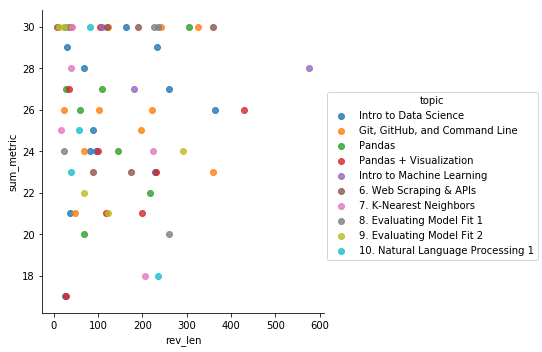

In [64]:
#metric against length of review
data["rev_len"] = data.text.str.len()
import seaborn as sns
import numpy as np
 
#def rounder(x, base = 10):
   # return int(base * round(float(x)/base))

#data["sum_metric_rnd"] = data["sum_metric"].apply(lambda x: rounder(x, base = 5))

sns.lmplot(x = "rev_len", y = "sum_metric", data = data,
           fit_reg = False, hue = "topic")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

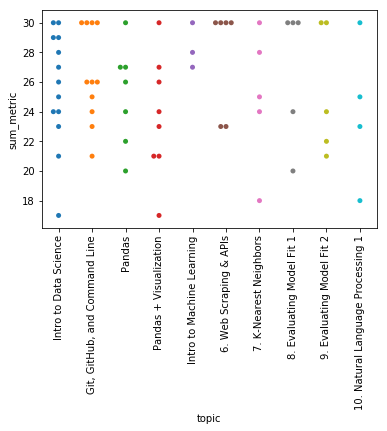

In [15]:
#swarmplot
from matplotlib import pyplot as plt
sns.swarmplot(x = "topic", y = "sum_metric", data = data)
plt.xticks(rotation = 90)
#looks like there are more reviews for early topics, less for later. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

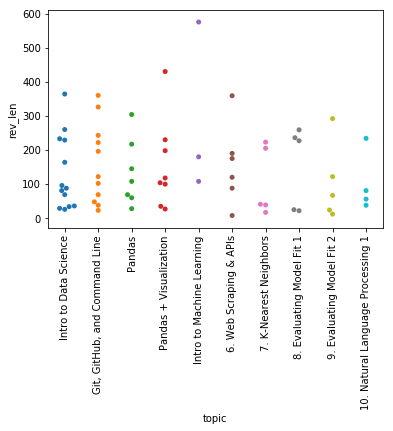

In [16]:
#lesson to len
from matplotlib import pyplot as plt
sns.swarmplot(x = "topic", y = "rev_len", data = data)
plt.xticks(rotation = 90)
#and that the number of reviews goes down

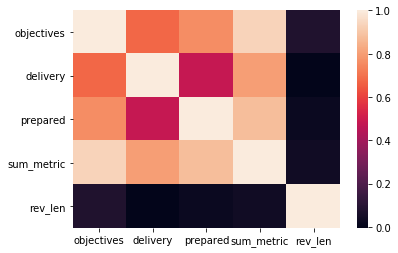

In [20]:
#correlation
stats = data[["objectives", "delivery", "prepared", "sum_metric", "rev_len"]]
corr = stats.corr()
sns.heatmap(corr)

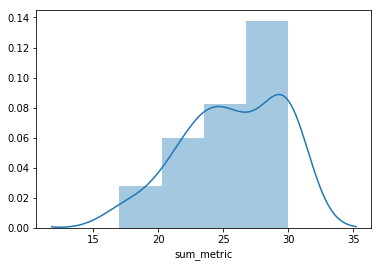

In [18]:
#distribution of metric
sns.distplot(data.sum_metric)

In [65]:
from textblob import TextBlob
data["nouns"] = data["sent_token"].astype(str).apply(lambda x: TextBlob(x).noun_phrases)
data["noun_count"] = data["nouns"].str.len()
data.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop,sent_token,word_token,sent_token_tag,rev_len,nouns,noun_count
0,Intro to Data Science,10,10,10,I liked the end with actually going through py...,Seemed like it went a little quicker than Alex...,,No,30,i liked the end with actually going through py...,liked end actually going python syntax seemed ...,[i liked the end with actually going through p...,"[i, liked, the, end, with, actually, going, th...","[(i, NN), (liked, VBD), (the, DT), (end, NN), ...",164,"[[ 'i, python syntax]",2
1,Intro to Data Science,10,9,10,Adam is great.,I liked it.,NO,No,29,adam is great. i liked it. no,adam great liked,"[adam is great., i liked it., no]","[adam, is, great, ., i, liked, it, ., no]","[(adam, NN), (is, VBZ), (great, JJ), (., .), (...",29,[[ 'adam],1
2,Intro to Data Science,9,7,10,Loved your overview of real examples to apply ...,Felt like you forgot a few things you had to c...,Felt like today was straight forward. Was nice...,No,26,loved your overview of real examples to apply ...,loved overview real examples apply various par...,[loved your overview of real examples to apply...,"[loved, your, overview, of, real, examples, to...","[(loved, VBN), (your, PRP$), (overview, NN), (...",364,"[real examples, various parts, data science wo...",5
3,Intro to Data Science,8,8,8,Good combination of overview and specifics!,Making sure everyone has done all the pre-work.,Nope,No,24,good combination of overview and specifics! ma...,good combination overview specifics making sur...,"[good combination of overview and specifics!, ...","[good, combination, of, overview, and, specifi...","[(good, JJ), (combination, NN), (of, IN), (ove...",96,[[ 'good combination],1
4,Intro to Data Science,10,9,9,The structure of the curriculum,N/A yet... good introduction so far!,,No,28,the structure of the curriculum n/a yet... goo...,structure curriculum n yet good introduction far,[the structure of the curriculum n/a yet... go...,"[the, structure, of, the, curriculum, n/a, yet...","[(the, DT), (structure, NN), (of, IN), (the, D...",69,"[[ 'the structure, curriculum n/a, ... good in...",3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 17 columns):
topic             67 non-null object
objectives        67 non-null int64
delivery          67 non-null int64
prepared          67 non-null int64
like              67 non-null object
not_like          67 non-null object
questions         67 non-null object
officehours       67 non-null object
sum_metric        67 non-null int64
text              67 non-null object
text_stop         67 non-null object
sent_token        67 non-null object
word_token        67 non-null object
sent_token_tag    67 non-null object
rev_len           67 non-null int64
nouns             67 non-null object
noun_count        67 non-null int64
dtypes: int64(6), object(11)
memory usage: 9.0+ KB


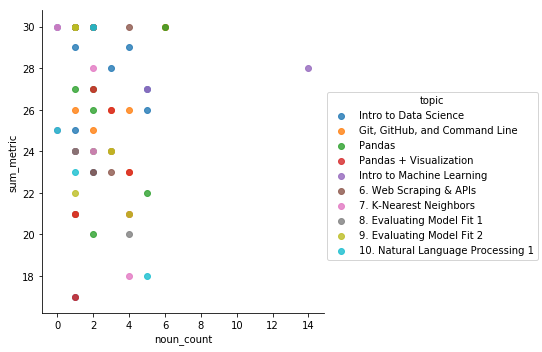

In [23]:
#plot nouns to rating
sns.lmplot(x = "noun_count", y = "sum_metric", data = data,
           fit_reg = False, hue = "topic")
#noun count increases, for 

In [67]:
data["sentiment"] = data["text"].apply(lambda x: TextBlob(x).sentiment)
data[["polarity", "subjectivity"]] = data["sentiment"].apply(pd.Series)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 20 columns):
topic             67 non-null object
objectives        67 non-null int64
delivery          67 non-null int64
prepared          67 non-null int64
like              67 non-null object
not_like          67 non-null object
questions         67 non-null object
officehours       67 non-null object
sum_metric        67 non-null int64
text              67 non-null object
text_stop         67 non-null object
sent_token        67 non-null object
word_token        67 non-null object
sent_token_tag    67 non-null object
rev_len           67 non-null int64
nouns             67 non-null object
noun_count        67 non-null int64
sentiment         67 non-null object
polarity          67 non-null float64
subjectivity      67 non-null float64
dtypes: float64(2), int64(6), object(12)
memory usage: 10.5+ KB


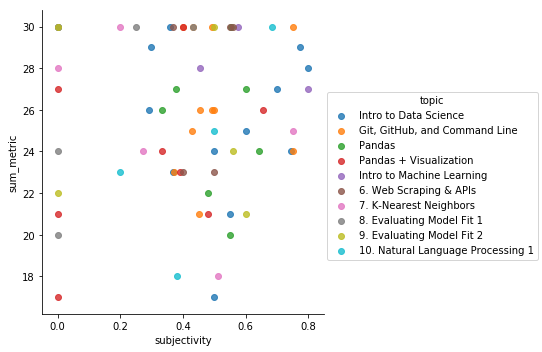

In [25]:
sns.lmplot(x = "subjectivity", y = "sum_metric", data = data,
           fit_reg = False, hue = "topic")

## Let's do some math, eh? 

In [32]:
#set X and y
X = data["sent_token"].astype(str)
y = data.sum_metric

#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 7)

#create vectorizer
vect = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

#fit vectorizer on training data
X_train_dtm = vect.fit_transform(X_train)

#apply vect tranformation to training
X_test_dtm = vect.transform(X_test)

#change train into dense matrix
columns = vect.get_feature_names()
data_text = pd.DataFrame(X_train_dtm.toarray(), columns=columns)
data_text.head()

,100,100 time,able,able connect,accept,accept caused,activities,activities better,acts,acts library,...,work,work exercises,work nope,work step,workflow,workflow real,world,world examples,wouldnt,wouldnt accept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.086691,0.109378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data_text.sum().sort_values(ascending = False)

good                   2.404178
class                  1.830082
time                   1.492701
pandas                 1.490377
liked                  1.442519
really                 1.331327
material               1.299004
nope                   1.286948
pace                   1.250815
lot                    1.199447
detailed               1.161615
overview               1.136101
bit                    1.049549
practice               1.031676
review                 0.974604
data                   0.965054
great                  0.964637
exercises              0.919461
explanation            0.911311
hands                  0.908022
like                   0.884979
code                   0.839555
little                 0.824986
confusing              0.814707
questions              0.798004
interactive            0.785025
git                    0.766227
content                0.763144
python                 0.752619
model                  0.750621
                         ...   
conferen

In [34]:
#naive Bayes
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.571428571429


# bring in the other data

In [3]:
path2 = "C:/Users/bpeake/Dropbox/1_DataSci/DS_GA/ds-dc-24/2_dataset/student_comments2.csv"
data2 = pd.read_csv(path2)
data2.head()

,What was the topic of the lesson?,I feel that I achieved the learning objectives for this lesson,The lesson agenda was well-organized and delivered,I feel prepared to continue practicing this skill outside of class.,What did you like about today's lesson?,What could have been better?,Do you have any other questions about the material or general comments?,Have you gone to Office Hours this week?
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,NaN,No
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,NaN,No
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,NaN,No
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,NaN,No


In [5]:
data2.columns = ['topic','objectives'
              ,'delivery','prepared','like','not_like','questions','officehours']
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 8 columns):
topic          163 non-null object
objectives     163 non-null int64
delivery       163 non-null int64
prepared       163 non-null int64
like           163 non-null object
not_like       160 non-null object
questions      61 non-null object
officehours    163 non-null object
dtypes: int64(3), object(5)
memory usage: 10.3+ KB


In [7]:
data2['sum_metric'] = data2.objectives + data2.delivery + data2.prepared
data2.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,NaN,No,18
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,NaN,No,24
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,NaN,No,25
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No,26
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,NaN,No,27


In [8]:
#fill na
data2['like'].fillna('', inplace=True)
data2['not_like'].fillna('', inplace=True)
data2['questions'].fillna('', inplace=True)

#merge 'em
data2["text"] = data2["like"].str.lower() + " " + data2["not_like"].str.lower() + " " + data2["questions"].str.lower()
data2.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,,No,18,very upbeat and energetic more substantive con...
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,,No,24,"great teacher, lots of great anecdotes materia..."
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,,No,25,"interactive, was able to meet people in the cl..."
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No,26,"good intro, good energy, got people out of the..."
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,,No,27,exercise with the classmates mac windows envir...


In [9]:
#stopwords out
from nltk.corpus import stopwords
import re

stop = stopwords.words("english")
def stopwords(x):
    x = re.sub("[^a-z\s]", " ", x.lower())
    x = [w for w in x.split() if w not in set(stop)]
    return " ".join(x)

data2["text_stop"] = data2["text"].apply(stopwords)
data2.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,,No,18,very upbeat and energetic more substantive con...,upbeat energetic substantive content
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,,No,24,"great teacher, lots of great anecdotes materia...",great teacher lots great anecdotes material sl...
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,,No,25,"interactive, was able to meet people in the cl...",interactive able meet people class little bit ...
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No,26,"good intro, good energy, got people out of the...",good intro good energy got people comfort zone...
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,,No,27,exercise with the classmates mac windows envir...,exercise classmates mac windows environment


In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize

data2["sent_token"] = data2["text"].apply(sent_tokenize)
data2["word_token"] = data2["text"].apply(word_tokenize)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 13 columns):
topic          163 non-null object
objectives     163 non-null int64
delivery       163 non-null int64
prepared       163 non-null int64
like           163 non-null object
not_like       163 non-null object
questions      163 non-null object
officehours    163 non-null object
sum_metric     163 non-null int64
text           163 non-null object
text_stop      163 non-null object
sent_token     163 non-null object
word_token     163 non-null object
dtypes: int64(4), object(9)
memory usage: 16.6+ KB


In [11]:
from nltk import pos_tag, pos_tag_sents
data2["sent_token_tag"] = pos_tag_sents(data2["text"].apply(word_tokenize).tolist())
data2.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop,sent_token,word_token,sent_token_tag
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,,No,18,very upbeat and energetic more substantive con...,upbeat energetic substantive content,[very upbeat and energetic more substantive co...,"[very, upbeat, and, energetic, more, substanti...","[(very, RB), (upbeat, JJ), (and, CC), (energet..."
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,,No,24,"great teacher, lots of great anecdotes materia...",great teacher lots great anecdotes material sl...,"[great teacher, lots of great anecdotes materi...","[great, teacher, ,, lots, of, great, anecdotes...","[(great, JJ), (teacher, NN), (,, ,), (lots, NN..."
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,,No,25,"interactive, was able to meet people in the cl...",interactive able meet people class little bit ...,"[interactive, was able to meet people in the c...","[interactive, ,, was, able, to, meet, people, ...","[(interactive, JJ), (,, ,), (was, VBD), (able,..."
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No,26,"good intro, good energy, got people out of the...",good intro good energy got people comfort zone...,"[good intro, good energy, got people out of th...","[good, intro, ,, good, energy, ,, got, people,...","[(good, JJ), (intro, NN), (,, ,), (good, JJ), ..."
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,,No,27,exercise with the classmates mac windows envir...,exercise classmates mac windows environment,[exercise with the classmates mac windows envi...,"[exercise, with, the, classmates, mac, windows...","[(exercise, NN), (with, IN), (the, DT), (class..."


In [13]:
from textblob import TextBlob
data2["nouns"] = data2["sent_token"].astype(str).apply(lambda x: TextBlob(x).noun_phrases)
data2["noun_count"] = data2["nouns"].str.len()
data2.head()

,topic,objectives,delivery,prepared,like,not_like,questions,officehours,sum_metric,text,text_stop,sent_token,word_token,sent_token_tag,nouns,noun_count
0,Intro to Data Science,5,7,6,Very upbeat and energetic,More substantive content,,No,18,very upbeat and energetic more substantive con...,upbeat energetic substantive content,[very upbeat and energetic more substantive co...,"[very, upbeat, and, energetic, more, substanti...","[(very, RB), (upbeat, JJ), (and, CC), (energet...","[[ 'very upbeat, substantive content]",2
1,Intro to Data Science,8,8,8,"Great teacher, lots of great anecdotes",Material and slides were a bit repetitive,,No,24,"great teacher, lots of great anecdotes materia...",great teacher lots great anecdotes material sl...,"[great teacher, lots of great anecdotes materi...","[great, teacher, ,, lots, of, great, anecdotes...","[(great, JJ), (teacher, NN), (,, ,), (lots, NN...","[[ 'great teacher, great anecdotes material, b...",3
2,Intro to Data Science,8,10,7,"Interactive, was able to meet people in the class",Just a little bit hard to hear/understand teac...,,No,25,"interactive, was able to meet people in the cl...",interactive able meet people class little bit ...,"[interactive, was able to meet people in the c...","[interactive, ,, was, able, to, meet, people, ...","[(interactive, JJ), (,, ,), (was, VBD), (able,...","[[ 'interactive, hear/understand teacher]",2
3,Intro to Data Science,9,8,9,"good intro, good energy, got people out of the...",the 3.6 vs 2.7 version issue wasn't great.,none\n,No,26,"good intro, good energy, got people out of the...",good intro good energy got people comfort zone...,"[good intro, good energy, got people out of th...","[good, intro, ,, good, energy, ,, got, people,...","[(good, JJ), (intro, NN), (,, ,), (good, JJ), ...","[good intro, good energy, comfort zones, versi...",4
4,Intro to Data Science,9,9,9,Exercise with the classmates,Mac Windows environment\n,,No,27,exercise with the classmates mac windows envir...,exercise classmates mac windows environment,[exercise with the classmates mac windows envi...,"[exercise, with, the, classmates, mac, windows...","[(exercise, NN), (with, IN), (the, DT), (class...","[[ 'exercise, classmates mac windows environment]",2


## meh. Try again. Compound sentmiment v. Good/bad? 

In [35]:
#Good/Bad Metric
data['metric'] = [1 if score >= 25 else 0 for score in data.sum_metric]

In [40]:
#set X and y
X = data["sent_token"].astype(str)
y = data.metric

#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 7)

#create vectorizer
vect = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

#fit vectorizer on training data
X_train_dtm = vect.fit_transform(X_train)

#apply vect tranformation to training
X_test_dtm = vect.transform(X_test)

#change train into dense matrix
columns = vect.get_feature_names()
data_text = pd.DataFrame(X_train_dtm.toarray(), columns=columns)
data_text.head()

,100,100 time,20x,20x hard,able,able connect,able interact,accept,accept caused,actual,...,work,work exercises,work nope,work step,workflow,workflow real,world,world examples,wouldnt,wouldnt accept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105981,0.0,0.0,0.133715,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data_text.sum().sort_values(ascending = False)

good                    2.067919
class                   1.862884
time                    1.463826
pace                    1.459015
nope                    1.286826
really                  1.254181
liked                   1.206389
lot                     1.197331
detailed                1.161160
material                1.154590
overview                1.135620
pandas                  1.067299
bit                     1.052845
like                    0.987433
review                  0.971560
practice                0.969289
data                    0.963478
little                  0.929657
exercises               0.869978
python                  0.862048
explanation             0.856737
great                   0.837078
questions               0.831689
confusing               0.815832
hands                   0.792640
interactive             0.768813
git                     0.767621
content                 0.764896
model                   0.750501
code                    0.727990
          

In [42]:
#naive Bayes
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.714285714286


## not bad... but doesn't account for how people actually feel, just numbers they click. 

In [69]:
#Good/Bad Metric
def feels_checker(x):
    analysis = TextBlob(x)
    if analysis.sentiment.polarity > 0:
        return "satisifed"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "dissatisfied"

data["feels"] = data["text"].apply(feels_checker)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 21 columns):
topic             67 non-null object
objectives        67 non-null int64
delivery          67 non-null int64
prepared          67 non-null int64
like              67 non-null object
not_like          67 non-null object
questions         67 non-null object
officehours       67 non-null object
sum_metric        67 non-null int64
text              67 non-null object
text_stop         67 non-null object
sent_token        67 non-null object
word_token        67 non-null object
sent_token_tag    67 non-null object
rev_len           67 non-null int64
nouns             67 non-null object
noun_count        67 non-null int64
sentiment         67 non-null object
polarity          67 non-null float64
subjectivity      67 non-null float64
feels             67 non-null object
dtypes: float64(2), int64(6), object(13)
memory usage: 11.1+ KB


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

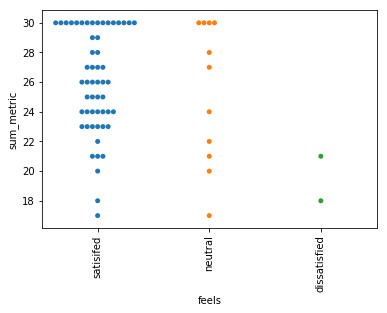

In [70]:
#lesson to len
from matplotlib import pyplot as plt
sns.swarmplot(x = "feels", y = "sum_metric", data = data)
plt.xticks(rotation = 90)

They're speaking postitively even when they leave bad number reviews. 

## Does time have an effect? 

In [71]:
from datetime import datetime
data["date"] = data["topic"]
data["day"] = data["topic"]


topics_date = {"date": {"Intro to Data Science": pd.Timestamp(datetime(2017, 12, 5)), 
                        "Git, GitHub, and Command Line": pd.Timestamp(datetime(2017, 12, 7)), 
                        "Pandas": pd.Timestamp(datetime(2017, 12, 12)),
                        "Pandas + Visualization": pd.Timestamp(datetime(2017, 12, 14)),
                        "Intro to Machine Learning": pd.Timestamp(datetime(2017, 12, 19)),
                        "6. Web Scraping & APIs": pd.Timestamp(datetime(2017, 12, 21)),
                        "7. K-Nearest Neighbors": pd.Timestamp(datetime(2018, 1, 2)),
                        "8. Evaluating Model Fit 1": pd.Timestamp(datetime(2018, 1, 4)),
                        "9. Evaluating Model Fit 2": pd.Timestamp(datetime(2018, 1, 9)),
                        "10. Natural Language Processing 1": pd.Timestamp(datetime(2018, 1, 11))}}

topics_day = {"day": {"Intro to Data Science": "tuesday", 
                        "Git, GitHub, and Command Line": "thursday",
                        "Pandas": "tuesday",
                        "Pandas + Visualization": "thursday", 
                        "Intro to Machine Learning": "tuesday",
                        "6. Web Scraping & APIs": "thursday",
                        "7. K-Nearest Neighbors": "tuesday",
                        "8. Evaluating Model Fit 1": "thursday",
                        "9. Evaluating Model Fit 2": "tuesday",
                        "10. Natural Language Processing 1": "thursday"}}

data.replace(topics_date, inplace = True)
data.replace(topics_day, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 23 columns):
topic             67 non-null object
objectives        67 non-null int64
delivery          67 non-null int64
prepared          67 non-null int64
like              67 non-null object
not_like          67 non-null object
questions         67 non-null object
officehours       67 non-null object
sum_metric        67 non-null int64
text              67 non-null object
text_stop         67 non-null object
sent_token        67 non-null object
word_token        67 non-null object
sent_token_tag    67 non-null object
rev_len           67 non-null int64
nouns             67 non-null object
noun_count        67 non-null int64
sentiment         67 non-null object
polarity          67 non-null float64
subjectivity      67 non-null float64
feels             67 non-null object
date              67 non-null datetime64[ns]
day               67 non-null object
dtypes: datetime64[ns](1), float64(2), int

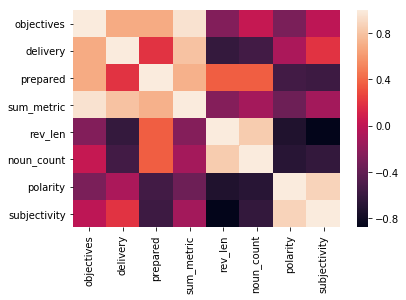

In [49]:
stats = data[["objectives", "delivery", "prepared", "sum_metric", "rev_len", "noun_count", "polarity", "subjectivity"]]
corr = stats.corr()
sns.heatmap(corr)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

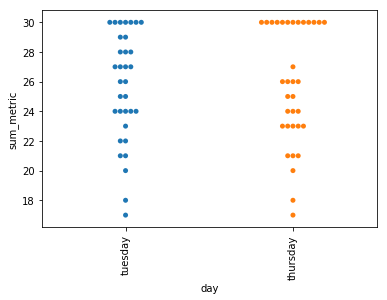

In [74]:
#sum Score by day of the week
from matplotlib import pyplot as plt
sns.swarmplot(x = "day", y = "sum_metric", data = data)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

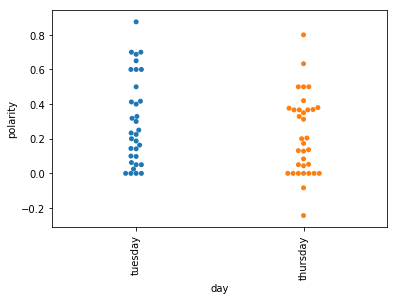

In [79]:
#sentiment by day of the week
sns.swarmplot(x = "day", y = "polarity", data = data)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

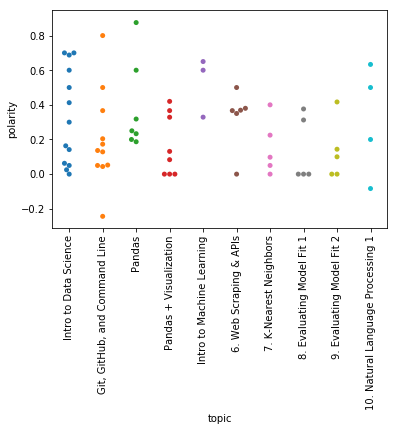

In [80]:
#sentiment by topic
from matplotlib import pyplot as plt
sns.swarmplot(x = "topic", y = "polarity", data = data)
plt.xticks(rotation = 90)

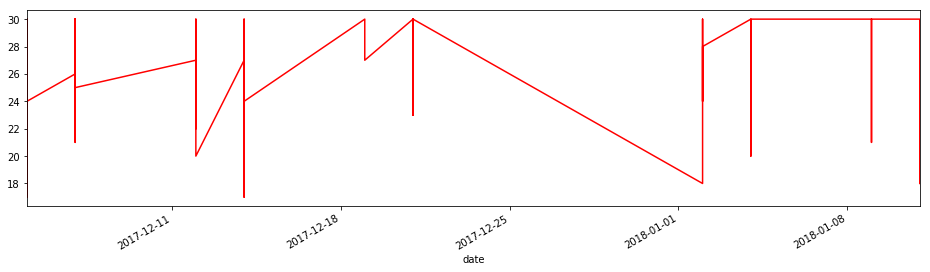

In [82]:
#sum score by date
scoretime = pd.Series(data = data["sum_metric"].values, index = data["date"])
scoretime.plot(figsize = (16,4), color = "r")

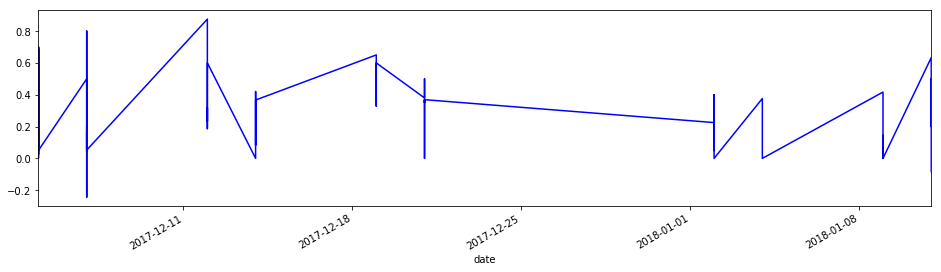

In [87]:
#feels over time
feelings_nothingmore = pd.Series(data = data["polarity"].values, index = data["date"])
feelings_nothingmore.plot(figsize = (16,4), color = "b")

In [ ]:
#both
scoretime.plot(figsize = (16,4), label = "score", legend = True)
feelings_nothingmore.plot(figsize = (16,4), legend = True)

In [ ]:
#feels
data = pd.get_dummies(data, columns = ["feels"]).head()
data.head()